In [1]:
### Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
sns.set(rc = {'figure.figsize':(15,8)})

In [2]:
### Function to plot graphs
def quadPlot(fileName:str, title:str='Default Title', maxDim:int=1600):
    dataframe = pd.read_csv(f"./results/{fileName}")
    dataframe = dataframe[dataframe["dimension"]<maxDim]
    QuadPlotObj = sns.FacetGrid(dataframe, col='queue', row='graphInput',height=5)
    QuadPlotObj.map(sns.scatterplot, "dimension", "time")
    QuadPlotObj.fig.subplots_adjust(top=0.92)
    QuadPlotObj.fig.suptitle(title)

In [3]:
### Compare Question Objective
def naiveCompare(fileName:str, title:str="Naive Default Title", maxDim:int=1600):
    dataframe = pd.read_csv(f"./results/{fileName}")
    dataframe = dataframe[(dataframe["dimension"] < maxDim) & (((dataframe["queue"]=="array") & (dataframe["graphInput"]=="adjMatrix")) | ((dataframe["queue"]=="heap") & (dataframe["graphInput"]=="adjList")))]
    fig = sns.scatterplot(data=dataframe, x="dimension", y="time", hue="graphInput", style="queue")
    fig.set(title=title)

In [18]:
def compPlot(dataframe, col:str, title:str="Default title"):
    compPlot = sns.FacetGrid(dataframe, col=col, height=8, hue="graphInput", style="queue" legend_out=True)
    compPlot.map_dataframe(sns.scatterplot, "dimension", "time")
    compPlot.fig.subplots_adjust(top=0.92)
    compPlot.fig.suptitle(title)
    compPlot.add_legend()

SyntaxError: invalid syntax (3275797235.py, line 2)

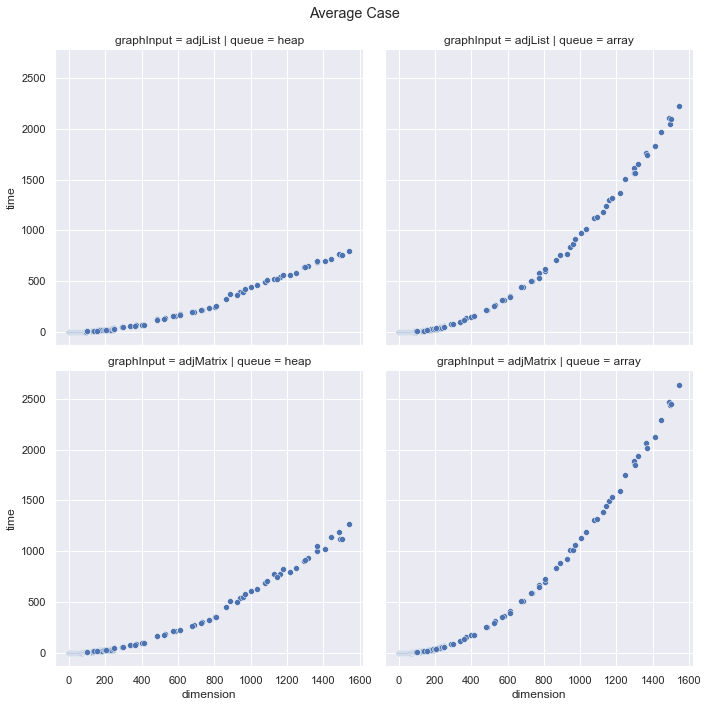

In [5]:
quadPlot(fileName="compareAllVar.csv", title="Average Case")

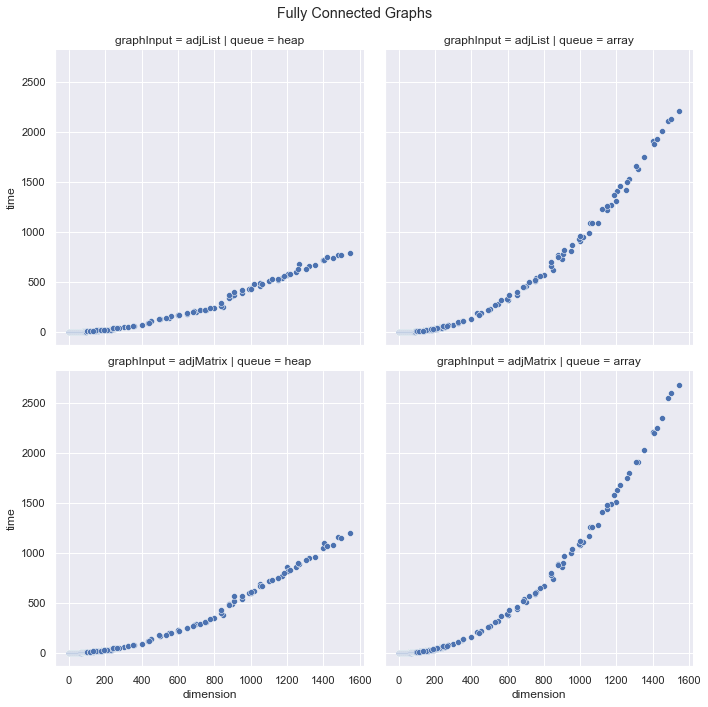

In [6]:
quadPlot(fileName="compareAllWeighted.csv", title="Fully Connected Graphs")

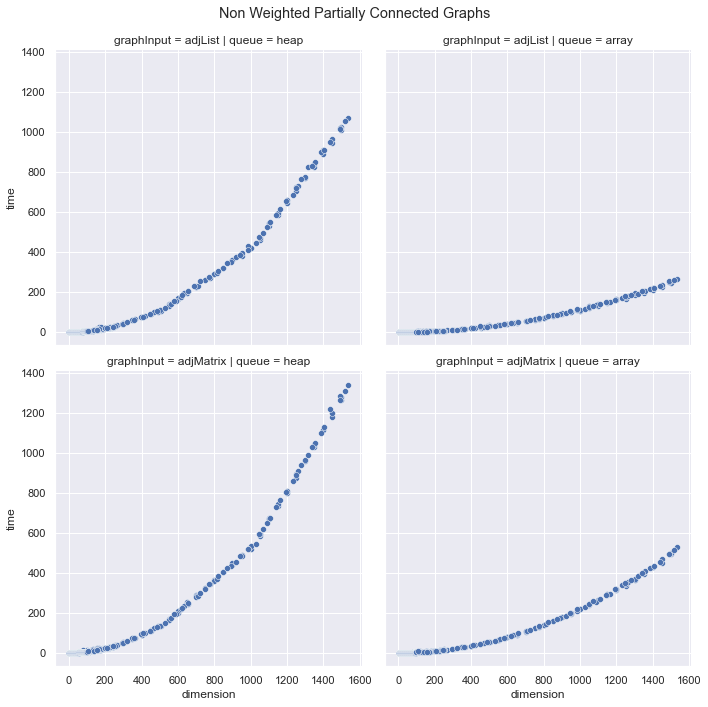

In [17]:
quadPlot(fileName="compareAllNonWeighted.csv", title="Non Weighted Partially Connected Graphs")

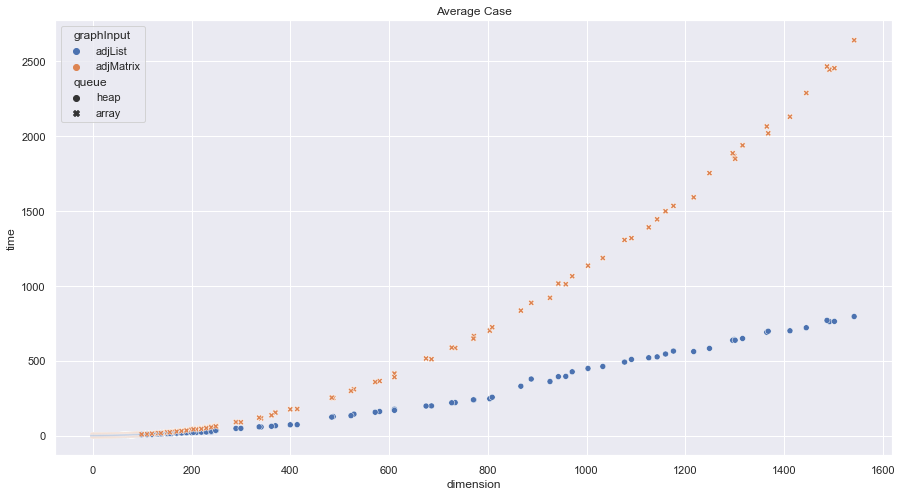

In [8]:
naiveCompare(fileName="compareAllVar.csv", title="Average Case")

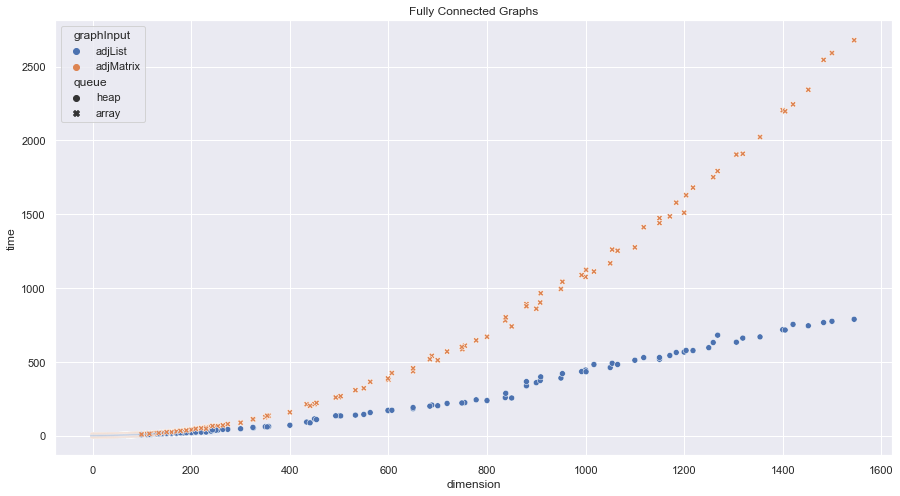

In [9]:
naiveCompare(fileName="compareAllWeighted.csv", title="Fully Connected Graphs")

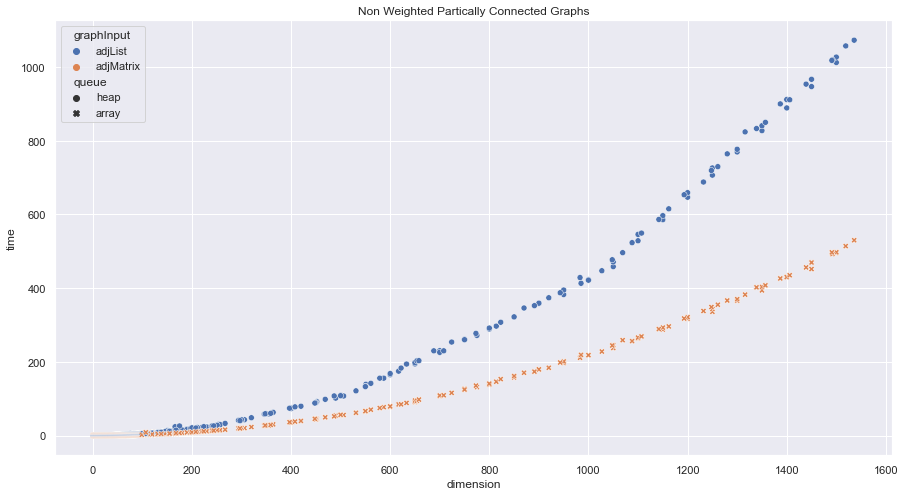

In [10]:
naiveCompare(fileName="compareAllNonWeighted.csv", title="Non Weighted Partically Connected Graphs")

In [11]:
fullConDF = pd.read_csv("./results/compareAllWeighted.csv")
fullConDF = fullConDF[((fullConDF["dimension"] < 1600) & ((fullConDF["queue"]=="array") & (fullConDF["graphInput"]=="adjMatrix")) | ((fullConDF["queue"]=="heap") & (fullConDF["graphInput"]=="adjList")))]
fullConDF["case"]=["Fully Connected"] * fullConDF.shape[0]
fullConDF

,dimension,edges,isDirectional,minWeight,maxWeight,queue,graphInput,time,case
0,100,4950,False,1,50,heap,adjList,6.201029,Fully Connected
3,100,4950,False,1,50,array,adjMatrix,9.161949,Fully Connected
4,110,5995,False,1,50,heap,adjList,7.336855,Fully Connected
7,110,5995,False,1,50,array,adjMatrix,11.276007,Fully Connected
8,120,7140,False,1,50,heap,adjList,8.260965,Fully Connected
...,...,...,...,...,...,...,...,...,...
34851,1421,1008910,False,1,50,array,adjMatrix,2244.776011,Fully Connected
34852,1452,1053426,False,1,50,heap,adjList,743.897915,Fully Connected
34855,1452,1053426,False,1,50,array,adjMatrix,2343.557835,Fully Connected
34856,1545,1192740,False,1,50,heap,adjList,787.813902,Fully Connected


In [12]:
ParConDF = pd.read_csv("./results/compareAllNonWeighted.csv")
ParConDF = ParConDF[((ParConDF["dimension"] < 1600) & ((ParConDF["queue"]=="array") & (ParConDF["graphInput"]=="adjMatrix")) | ((ParConDF["queue"]=="heap") & (ParConDF["graphInput"]=="adjList")))]
ParConDF["case"]=["Partially Connected"] * ParConDF.shape[0]
ParConDF

,dimension,edges,isDirectional,minWeight,maxWeight,queue,graphInput,time,case
0,100,2555,False,0,1,heap,adjList,6.994963,Partially Connected
3,100,2555,False,0,1,array,adjMatrix,6.636143,Partially Connected
4,110,3001,False,0,1,heap,adjList,6.114006,Partially Connected
7,110,3001,False,0,1,array,adjMatrix,3.365993,Partially Connected
8,120,3621,False,0,1,heap,adjList,7.058144,Partially Connected
...,...,...,...,...,...,...,...,...,...
35103,579,83629,False,0,1,heap,adjList,155.711174,Partially Connected
35106,579,83629,False,0,1,array,adjMatrix,74.719906,Partially Connected
35107,622,96636,False,0,1,heap,adjList,183.117151,Partially Connected
35110,622,96636,False,0,1,array,adjMatrix,84.717035,Partially Connected


In [13]:
bothDF = pd.concat([fullConDF, ParConDF])
bothDF

,dimension,edges,isDirectional,minWeight,maxWeight,queue,graphInput,time,case
0,100,4950,False,1,50,heap,adjList,6.201029,Fully Connected
3,100,4950,False,1,50,array,adjMatrix,9.161949,Fully Connected
4,110,5995,False,1,50,heap,adjList,7.336855,Fully Connected
7,110,5995,False,1,50,array,adjMatrix,11.276007,Fully Connected
8,120,7140,False,1,50,heap,adjList,8.260965,Fully Connected
...,...,...,...,...,...,...,...,...,...
35103,579,83629,False,0,1,heap,adjList,155.711174,Partially Connected
35106,579,83629,False,0,1,array,adjMatrix,74.719906,Partially Connected
35107,622,96636,False,0,1,heap,adjList,183.117151,Partially Connected
35110,622,96636,False,0,1,array,adjMatrix,84.717035,Partially Connected


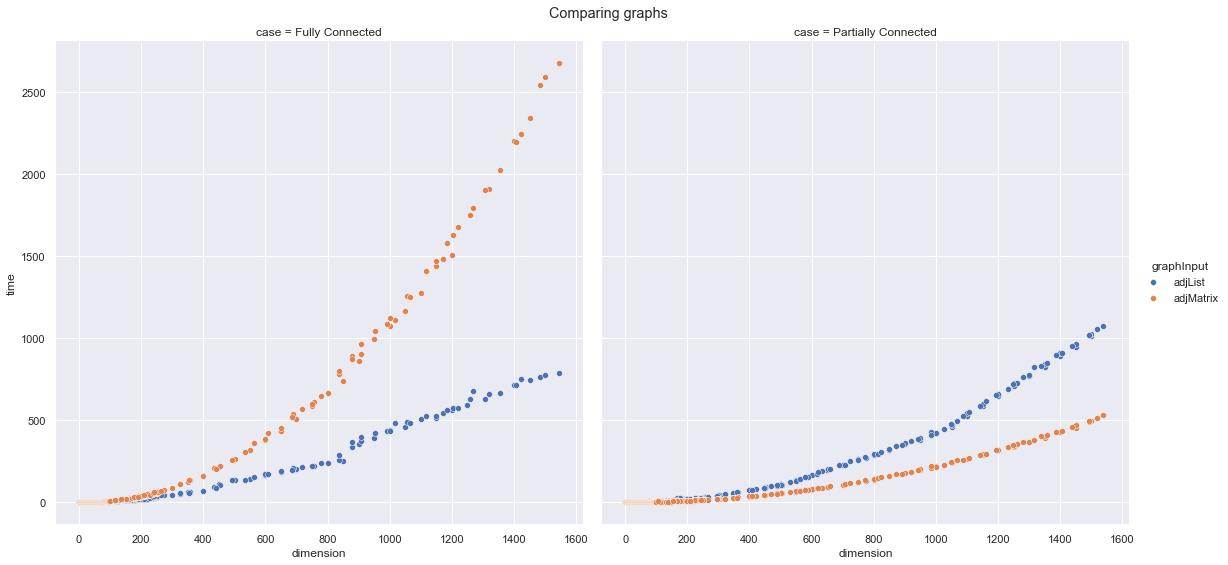

In [20]:
compPlot(dataframe=bothDF, col="case", title="Comparing graphs")

In [15]:
crossOver = pd.read_csv("./results/compareCrossOver.csv")
crossOver = crossOver[crossOver["maxWeight"]!=0]
crossOver = crossOver[((crossOver["queue"] == "array") & (crossOver["graphInput"]=="adjMatrix")) | ((crossOver["queue"]=="heap") & (crossOver["graphInput"]=="adjList"))]
crossOver["algo"] = [""] * crossOver.shape[0]

crossOver

,dimension,edges,isDirectional,minWeight,maxWeight,queue,graphInput,time,algo
4,700,122685,False,0,1,heap,adjList,220.798969,
7,700,122685,False,0,1,array,adjMatrix,103.745937,
8,700,162889,False,0,2,heap,adjList,166.563749,
11,700,162889,False,0,2,array,adjMatrix,154.160261,
12,700,183445,False,0,3,heap,adjList,159.056902,
...,...,...,...,...,...,...,...,...,...
2255,700,163452,False,0,2,array,adjMatrix,155.076265,
2256,700,183534,False,0,3,heap,adjList,155.255079,
2259,700,183534,False,0,3,array,adjMatrix,192.791224,
2260,700,195941,False,0,4,heap,adjList,156.575918,


<AxesSubplot:xlabel='edges', ylabel='time'>

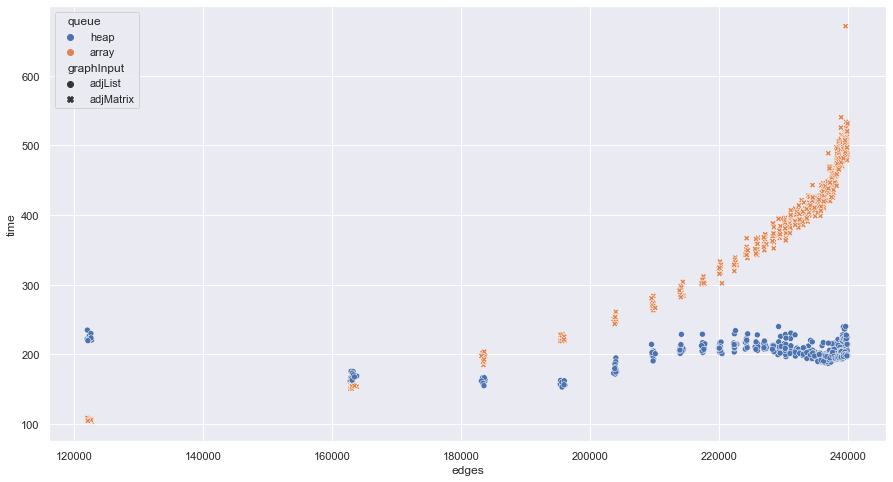

In [16]:
sns.scatterplot(data=crossOver, x="edges", y="time", hue="queue", style="graphInput")